ESTIMATION OF PARAMETERS ON THE BASIS OF WEST BENGAL DATA

gamma=0.0378281 beta=0.167933 R0=4.43938


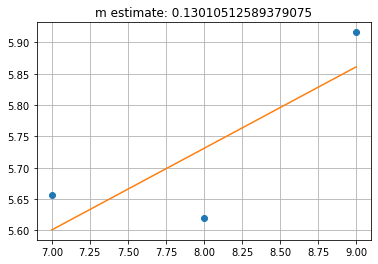

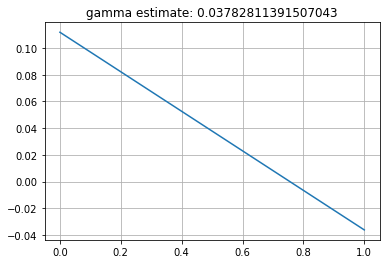

In [1]:
#parameter estimation


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

#West bengal last 10 days data

total=[3155,3188,3281,3275,3310,3340,3357,3348,3370,3455];
death=[56,62,59,59,53,62,62,53,58,60];
recovered=[2923,2961,2954,2926,2944,3013,2986,3009,3036,3024];

#Total recoered and infected calculation
R=[x + y for x, y in zip(death, recovered)] # total recovered
I=[x - y for x, y in zip(total, R)] #total infected

en=len(total); st=en-3;
#st=0; en=st+10;
y=np.log(I[st:en])

t=np.array(range(st, en))

m, b = np.polyfit(t, y, 1)
plt.plot(t, (y), 'o')
plt.plot(t, (m*t + b))
plt.title('m estimate: %s' % m)
plt.grid()

#%%
plt.figure()


g=[]
for i in range(st, en-1):
    oo=(R[i+1]-R[i])/I[i]
    g.append(oo)

plt.plot(g)    
plt.grid(1)
gamma= np.mean(g);
plt.title('gamma estimate: %s' % gamma)

#%%
gamma
beta=m+gamma
print('gamma=%g beta=%g R0=%g' %(gamma, beta, beta/gamma))

Initialization of the model with the susceptible recovered and Infected level of the last date S0=19416,I0=154,R0=6. and simulating for next 60 days, t0=0, t1=days to run=60 days

In [2]:
#Compartmental SIR model

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N
        dI=beta*S*I/N-gamma*I
        dR=gamma*I
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(19416,  154, 6, 0, 60, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

Text(0.5, 1.0, 'tmax=49, Imax=45% Total infected: 52.31%')

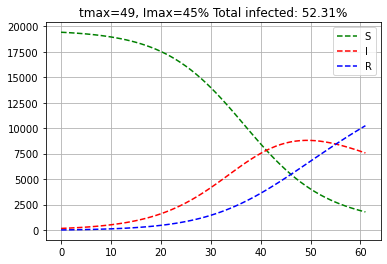

In [3]:
#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Travel between the different cities

In [4]:
##Train Data import for the different stations

import pandas as pd
import os
data_set=pd.read_csv("sealdah_diamondharbour1.csv",header=None)
data_set

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,NaN,SEALDAH,PARK CIRCUS,BALLYGUNGE JN.,DHAKURIA F,JADABPUR,BAGHA JATIN F,GARIA F,NARENDRAPUR HALT,SONARPUR JN.,...,DAKSHIN DURGAPUR HAL,HOTAR,DHAMUA,UTTAR RADHA NAGAR HA,MAGRA HAT,DEULA,NETRA,BASULDANGA,GURUDAS NAGAR,DIAMOND HARBOUR
1,SEALDAH,0,339,1056,166,1095,637,940,78,4975,...,9,220,198,10,1357,30,13,8,0,1642
2,PARK CIRCUS,0,0,53,21,62,18,128,5,276,...,0,13,38,6,179,9,1,0,0,176
3,BALLYGUNGE JN.,0,0,0,9,22,82,255,0,1229,...,1,13,17,3,70,281,2,0,0,283
4,DHAKURIA F,0,0,0,0,2,2,3,0,238,...,1,3,1,0,53,119,0,0,0,139
5,JADABPUR,0,0,0,0,0,13,189,0,857,...,1,14,10,1,97,66,133,1,0,225
6,BAGHA JATIN F,0,0,0,0,0,0,83,0,304,...,0,8,11,0,33,45,255,0,0,161
7,GARIA F,0,0,0,0,0,0,0,0,129,...,4,715,7,2,55,63,29,52,71,339
8,NARENDRAPUR HALT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,SONARPUR JN.,0,0,0,0,0,0,0,0,0,...,16,1185,1227,6,17,4,4,0,0,1986


Population of the different cities

In [5]:
#Population and Hospital data

data_set1=pd.read_csv("population_city.csv",header=None)
data_set1

,0,1,2,3,4
0,S No,Station,Population,Total,Vacant
1,1,Sealdah,19416,208,54
2,2,Park Circus,31280,333,121
3,3,Ballygunge Jn,20724,280,31
4,4,Dhakuria,38450,502,163
5,5,Jadabpur,21503,259,53
6,6,Bagha Jatin,40208,757,153
7,7,Garia,40805,300,120
8,8,Narendrapur,1868,74,28
9,9,Sonarpur,219863,180,153


Modelling for the inflow and the outflow of the population with gamma=0.0378281 beta=0.167933 R0=4.43938 estimated for the west bengal

In [6]:
population=[]
for i in range(1,24):
    a=int(data_set1.iloc[i,2])
    population.append(a)
print('Population:', population)

Population: [19416, 31280, 20724, 38450, 21503, 40208, 40805, 1868, 219863, 1000, 27120, 433119, 4034, 16507, 4155, 10055, 6070, 574238, 5169, 7731, 1749, 2183, 346967]


In [7]:
Cij=[]
for i in range(1,24):
    b=int(data_set.iloc[i,23])
    Cij.append(b)
print('Cij:', Cij)

Cij: [1642, 176, 283, 139, 225, 161, 339, 0, 1986, 263, 147, 1360, 284, 29, 375, 435, 0, 3034, 1369, 806, 546, 17, 0]


In [8]:
init_suscpt=population
print('Initial Suspected: ', init_suscpt)


Initial Suspected:  [19416, 31280, 20724, 38450, 21503, 40208, 40805, 1868, 219863, 1000, 27120, 433119, 4034, 16507, 4155, 10055, 6070, 574238, 5169, 7731, 1749, 2183, 346967]


In [9]:
init_infected=[]
for i in range(1,24):
    a=int((data_set1.iloc[i,3]))-int(data_set1.iloc[i,4])
    init_infected.append(a)
print('Initial Infected:', init_infected)


Initial Infected: [154, 212, 249, 339, 206, 604, 180, 46, 27, 33, 163, 478, 46, 180, 62, 190, 43, 658, 40, 40, 28, 67, 467]


In [10]:
gamma=0.0378281
init_recovered=[]
for i in range(0,23):
    c=init_infected[i]*gamma
    init_recovered.append(c)
print('Initial Recovered:', init_recovered)

Initial Recovered: [5.8255274, 8.019557200000001, 9.419196900000001, 12.823725900000001, 7.792588600000001, 22.848172400000003, 6.809058, 1.7400926, 1.0213587000000002, 1.2483273000000001, 6.1659803, 18.081831800000003, 1.7400926, 6.809058, 2.3453422, 7.187339000000001, 1.6266083000000002, 24.890889800000004, 1.5131240000000001, 1.5131240000000001, 1.0591868, 2.5344827000000003, 17.6657227]


In [11]:
travel_sealdah=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,1]))
    travel_sealdah.append(sealdah)
print('Sealdah travelling:', travel_sealdah)

Sealdah travelling: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
N_sealdah=int(data_set1.iloc[1,2])
print(N_sealdah)

19416


In [13]:
Sum_Cij_sealdah=0
for i in travel_sealdah:
    
    Sum_Cij_sealdah+=i
    a=(Sum_Cij_sealdah)
print(a)

0


In [14]:
for i in travel_sealdah:
    for j in init_infected:
        for k in population:
            Sum_Cij_sealdah_1=0
            Sum_Cij_sealdah_1+=i*(j/k)
            b=(Sum_Cij_sealdah_1)
print(b)

0.0


In [15]:
beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[1],  init_infected[1], init_recovered[1], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

Text(0.5, 1.0, 'tmax=16, Imax=7.58% Total infected: 0.02551%')

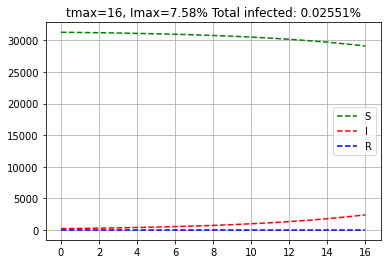

In [16]:
#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

In [17]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,2]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

Sealdah travelling: [339, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
N_sealdah=int(data_set1.iloc[2,2])
print(N_sealdah)

31280


In [19]:
Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

339


In [20]:
beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[2],  init_infected[2], init_recovered[2], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

Text(0.5, 1.0, 'tmax=16, Imax=12.8% Total infected: 0.04502%')

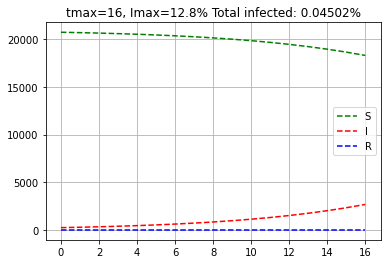

In [21]:
#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [1056, 53, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
20724
1109


Text(0.5, 1.0, 'tmax=16, Imax=9.66% Total infected: 0.0331%')

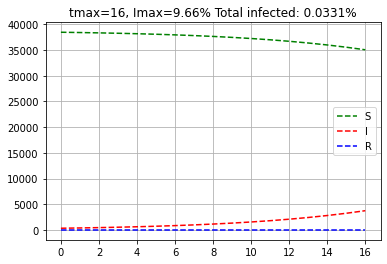

In [22]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,3]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[3,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[3],  init_infected[3], init_recovered[3], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [166, 21, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
38450
196


Text(0.5, 1.0, 'tmax=16, Imax=10.4% Total infected: 0.03599%')

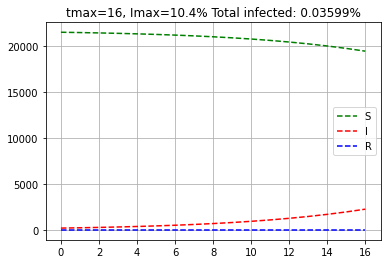

In [23]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,4]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[4,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[4],  init_infected[4], init_recovered[4], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [1095, 62, 22, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
21503
1181


Text(0.5, 1.0, 'tmax=16, Imax=15.5% Total infected: 0.05604%')

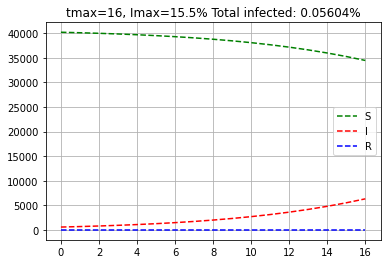

In [24]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,5]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[5,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[5],  init_infected[5], init_recovered[5], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [637, 18, 82, 2, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
40208
752


Text(0.5, 1.0, 'tmax=16, Imax=5.05% Total infected: 0.01664%')

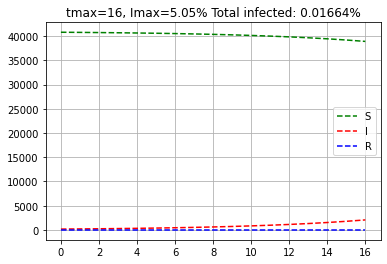

In [25]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,6]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[6,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[6],  init_infected[6], init_recovered[6], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [940, 128, 255, 3, 189, 83, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
40805
1598


Text(0.5, 1.0, 'tmax=16, Imax=23.3% Total infected: 0.09365%')

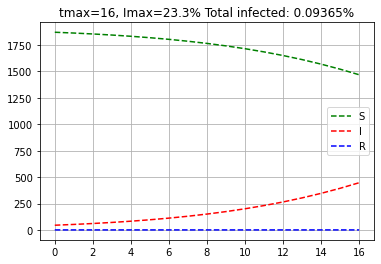

In [26]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,7]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[7,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[7],  init_infected[7], init_recovered[7], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [78, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1868
83


Text(0.5, 1.0, 'tmax=16, Imax=0.147% Total infected: 0.0004646%')

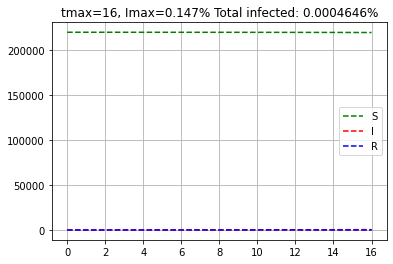

In [27]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,8]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[8,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[8],  init_infected[8], init_recovered[8], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [4975, 276, 1229, 238, 857, 304, 129, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
219863
8008


Text(0.5, 1.0, 'tmax=16, Imax=29.2% Total infected: 0.1274%')

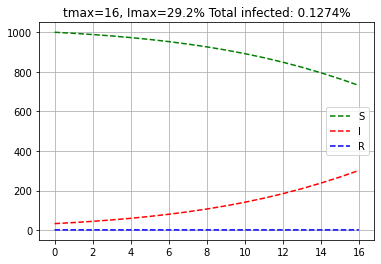

In [28]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,9]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[9,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[9],  init_infected[9], init_recovered[9], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [19353, 279, 218, 7, 26, 233, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1000
20123


Text(0.5, 1.0, 'tmax=16, Imax=6.77% Total infected: 0.02265%')

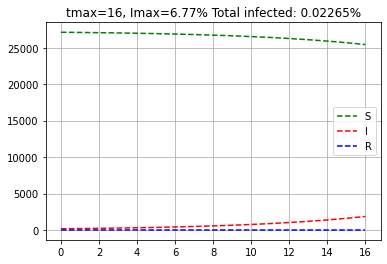

In [29]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,10]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[10,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[10],  init_infected[10], init_recovered[10], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [158, 2252, 402, 26, 10, 14, 206, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
27120
3075


Text(0.5, 1.0, 'tmax=16, Imax=1.31% Total infected: 0.004171%')

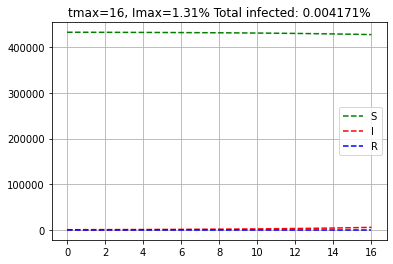

In [30]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,11]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[11,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[11],  init_infected[11], init_recovered[11], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [2546, 396, 7722, 2666, 2977, 1744, 2102, 0, 2025, 645, 1053, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
433119
23876


Text(0.5, 1.0, 'tmax=16, Imax=12.2% Total infected: 0.04328%')

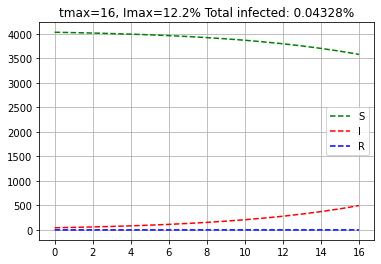

In [31]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,12]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[12,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[12],  init_infected[12], init_recovered[12], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [63, 22, 6, 0, 610, 199, 10, 0, 64, 6, 2, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4034
990


Text(0.5, 1.0, 'tmax=16, Imax=11.7% Total infected: 0.04094%')

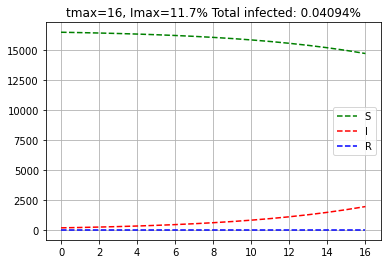

In [32]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,13]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[13,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[13],  init_infected[13], init_recovered[13], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [9, 0, 1, 1, 1, 0, 4, 0, 16, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
16507
33


Text(0.5, 1.0, 'tmax=16, Imax=15.4% Total infected: 0.0564%')

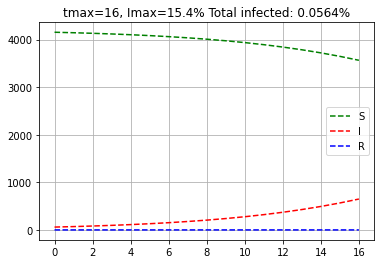

In [33]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,14]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[14,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[14],  init_infected[14], init_recovered[14], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [220, 13, 13, 3, 14, 8, 715, 0, 1185, 252, 8, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4155
2442


Text(0.5, 1.0, 'tmax=16, Imax=18.8% Total infected: 0.07052%')

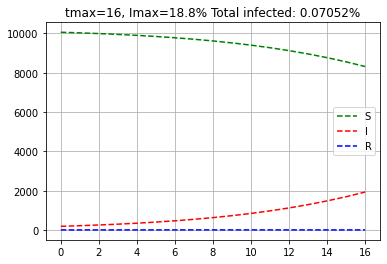

In [34]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,15]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[15,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[15],  init_infected[15], init_recovered[15], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [198, 38, 17, 1, 10, 11, 7, 0, 1227, 192, 14, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10055
1719


Text(0.5, 1.0, 'tmax=16, Imax=7.9% Total infected: 0.02688%')

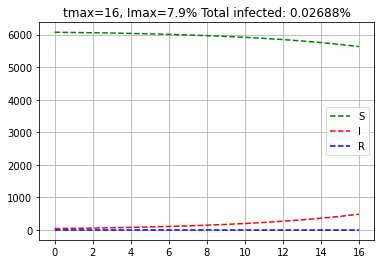

In [35]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,16]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[16,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[16],  init_infected[16], init_recovered[16], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [10, 6, 3, 0, 1, 0, 2, 0, 6, 349, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
6070
379


Text(0.5, 1.0, 'tmax=16, Imax=1.36% Total infected: 0.00433%')

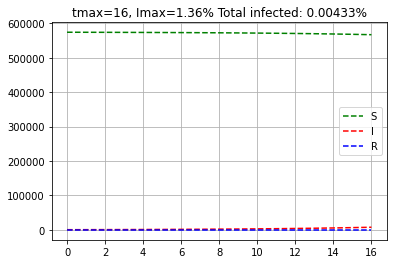

In [36]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,17]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[17,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[17],  init_infected[17], init_recovered[17], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [1357, 179, 70, 53, 97, 33, 55, 0, 17, 1, 235, 634, 104, 0, 244, 92, 0, 0, 0, 0, 0, 0, 0]
574238
3171


Text(0.5, 1.0, 'tmax=16, Imax=8.57% Total infected: 0.02939%')

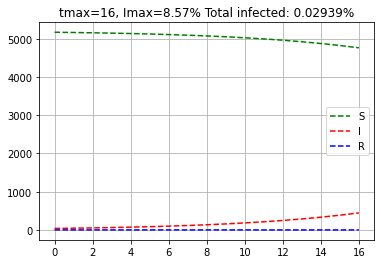

In [37]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,18]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[18,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[18],  init_infected[18], init_recovered[18], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [30, 9, 281, 119, 66, 45, 63, 0, 4, 2, 0, 2, 0, 0, 86, 84, 0, 0, 0, 0, 0, 0, 0]
5169
791


Text(0.5, 1.0, 'tmax=16, Imax=5.88% Total infected: 0.01963%')

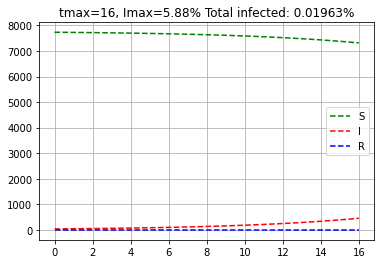

In [38]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,19]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[19,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[19],  init_infected[19], init_recovered[19], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [13, 1, 2, 0, 133, 255, 29, 0, 4, 0, 0, 0, 0, 0, 0, 365, 0, 0, 0, 0, 0, 0, 0]
7731
802


Text(0.5, 1.0, 'tmax=16, Imax=16.4% Total infected: 0.06162%')

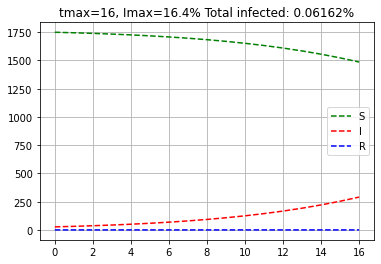

In [39]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,20]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[20,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[20],  init_infected[20], init_recovered[20], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [8, 0, 0, 0, 1, 0, 52, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0]
1749
65


Text(0.5, 1.0, 'tmax=16, Imax=27.7% Total infected: 0.1154%')

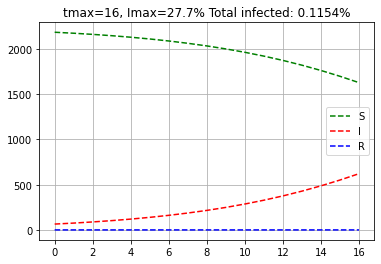

In [40]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,21]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[21,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[21],  init_infected[21], init_recovered[21], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [1642, 176, 283, 139, 225, 161, 339, 0, 1986, 263, 147, 1360, 284, 29, 375, 435, 0, 3034, 1369, 806, 546, 17, 0]
346967
13616


Text(0.5, 1.0, 'tmax=16, Imax=1.59% Total infected: 0.005085%')

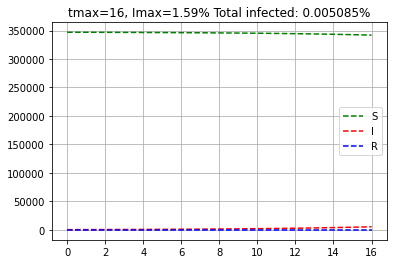

In [41]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,23]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[23,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[22],  init_infected[22], init_recovered[22], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

Sealdah travelling: [1642, 176, 283, 139, 225, 161, 339, 0, 1986, 263, 147, 1360, 284, 29, 375, 435, 0, 3034, 1369, 806, 546, 17, 0]
346967
13616


Text(0.5, 1.0, 'tmax=16, Imax=1.59% Total infected: 0.005085%')

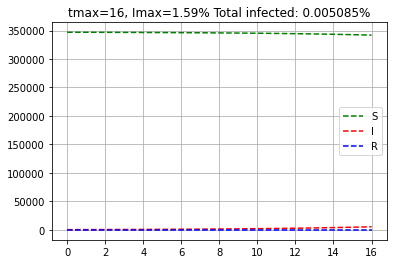

In [42]:
travel_sealdah2=[]
for i in range(1,24):
    sealdah=int((data_set.iloc[i,23]))
    travel_sealdah2.append(sealdah)
print('Sealdah travelling:', travel_sealdah2)

N_sealdah=int(data_set1.iloc[23,2])
print(N_sealdah)

Sum_Cij_sealdah2=0
for i in travel_sealdah2:
    Sum_Cij_sealdah2+=i
    k=(Sum_Cij_sealdah2)
print(k)

beta=0.167933

def SIR(S0,I0,R0,t0, t1, beta, gamma):
    N=S0+R0+I0; #initialization
    S=S0; 
    R=R0; 
    I=I0;
    
    SS=[S0]; #updating the function
    RR=[R0]; 
    II=[I0];
    tt=[t0];
    
    dt=1; #time step
    t=t0
    
    while t <= t1:
        dS=-beta*S*I/N-(S*b*beta)/(N_sealdah+a)
        dI=beta*S*I/N-gamma*I/N+(S*b*beta)/(N_sealdah+a)
        dR=gamma*I/N
        S=S+dt*dS;
        I=I+dt*dI;
        R=R+dt*dR;
        SS.append(S); II.append(I); RR.append(R)
        t=t+dt;
        tt.append(t)
    return(SS,II,RR,tt)

SIRT=SIR(population[22],  init_infected[22], init_recovered[22], 0.0, 15, beta, gamma)
tt=SIRT[3]; SS=SIRT[0]; II=SIRT[1]; RR=SIRT[2]; 

#Plotting
plt.plot(tt, SS, '--g')
plt.plot(tt, II, '--r')
plt.plot(tt, RR, '--b')

plt.grid(1)
plt.legend(['S','I','R'])
oo=II.index(max(II));
N=(II[0]+RR[0]+SS[0]);
tmax=tt[oo]; Imax=II[oo];
inftot = RR[-1]/N
plt.title('tmax=%g, Imax=%2.3g%% Total infected: %2.4g%%'  % (tmax, Imax/N*100, inftot*100))

In [43]:
print(population[22])

346967


In [44]:
population=[]
for i in range(1,24):
    a=(data_set1.iloc[i,1])
    population.append(a)
print('Population:', population)

Population: ['Sealdah', 'Park Circus', 'Ballygunge Jn', 'Dhakuria', 'Jadabpur', 'Bagha Jatin', 'Garia', 'Narendrapur', 'Sonarpur', 'Subhasgram', 'Mallukpur', 'Baruipur', 'Kalyanpur', 'Dakshin Durgapur', 'Hotar', 'Dhamua', 'Uttar Radhanagar', 'Magra Hat', 'Deula', 'Netra', 'Basuldanga', 'Gurudas Nagar', 'Diamond Harbour']


In [45]:
Infection_level=[7.58,12.8,9.66,10.4,15.5,5.05,23.3,0.147,29.2,6.77,1.31,12.2,11.7,15.4,18.8,7.9,1.36,8.57,5.88,16.4,27.7,1.59,7.59]

In [46]:
x=np.array(population)
y=np.array(Infection_level)

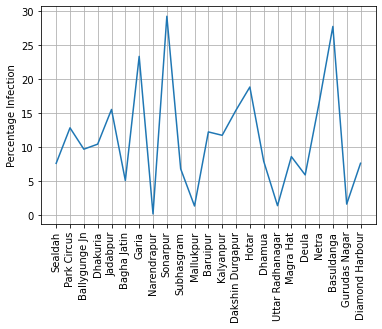

In [47]:
plt.grid(1)
plt.plot(x, y)
plt.xticks(rotation = (90), fontsize = 10)
plt.ylabel("Percentage Infection")
plt.show()
